In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'dark_background'])

Create an array of equally spaced values
* `arange`
* `linspace`


In [2]:
x = np.arange(0,10,1)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
x = np.linspace(0,1,21)
x

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

Can then define a 1D function $f(x) = ...$

In [4]:
f = x**2 * np.sin(x*10)

In [5]:
f

array([ 0.        ,  0.00119856,  0.00841471,  0.02244364,  0.0363719 ,
        0.03740451,  0.0127008 , -0.04297095, -0.1210884 , -0.19794985,
       -0.23973107, -0.21342595, -0.10058958,  0.09088819,  0.32192343,
        0.52762499,  0.63318928,  0.57690694,  0.33381597, -0.06782389,
       -0.54402111])

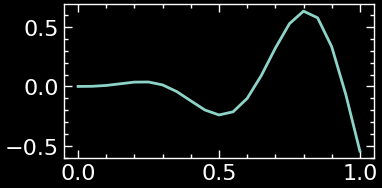

In [6]:
plt.figure(figsize=(4,2))
plt.plot(x,f)
plt.show()

How do we do this in 2 dimensions?

# Meshgrid

The `np.meshgrid` function is used primarily for
* Creating/Plotting 2D functions $f(x,y)$
* Generating combinations of 2 or more numbers

**Example**: How you might think to create a 2D function $f(x,y)$

In [7]:
x = np.linspace(0,10,100)
y = np.linspace(0,10,100)

Try to create a 2D function

In [8]:
f = x**2+y**2

Plot

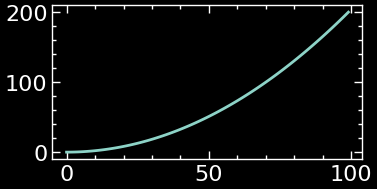

In [9]:
plt.figure(figsize=(4,2))
plt.plot(f)
plt.show()

But $f$ is a 1 dimensional function! How does one generate a surface plot?

In [10]:
x = np.arange(3)
y = np.arange(3)

In [11]:
y

array([0, 1, 2])

In [12]:
x

array([0, 1, 2])

Generating a meshgrid:

In [13]:
xv, yv = np.meshgrid(x, y)

In [14]:
xv

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [15]:
yv

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2]])

These arrays, `xv` and `yv`, each seperately give the $x$ and $y$ coordinates on a 2D grid. You can do normal numpy operations on these arrays:

In [16]:
xv**2 + yv**2

array([[0, 1, 4],
       [1, 2, 5],
       [4, 5, 8]], dtype=int32)

This can be done on a larger scale to plot surface plots of 2D functions

* <span style="color: yellow;"> Generate functions $f(x,y) = e^{-(x^2+y^2)}$ for $-2\leq x \leq 2$ and $-1 \leq y \leq 1$ </span>


In [17]:
x = np.linspace(-2,2,100)
y = np.linspace(-1,1,100)
xv, yv = np.meshgrid(x, y)
f = np.exp(-xv**2-yv**2)

(*Note*: `pcolormesh` is typically the preferable function for 2D plotting, as opposed to `imshow` or `pcolor`, which take longer.)

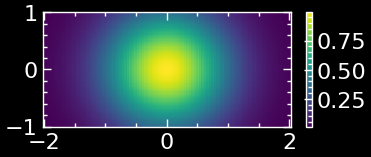

In [18]:
plt.figure(figsize=(4,1.5))
plt.pcolormesh(xv, yv, f)
plt.colorbar()
plt.show()

* <span style="color: yellow;"> Creating a rectangular mask $f(x,y) = \begin{cases} 1 & x^2+y^2 < 1 \\ 0 & x^2+y^2 \geq 1 \end{cases}$ for $-5 \leq x \leq 5$ and $-5 \leq y \leq 5$ </span>

In [57]:
x = y = np.linspace(-5,5,500)
xv, yv = np.meshgrid(x, y)
f = (xv**2 + yv**2 < 1).astype(float)

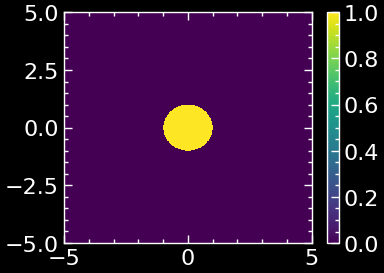

In [58]:
plt.figure(figsize=(4,3))
plt.pcolormesh(xv, yv, f)
plt.colorbar()
plt.show()

Can build 3 dimensional meshgrids as well:

In [59]:
xv, yv, zv = np.meshgrid(x,x,x)

**Images**: Suppose I have a saved image and I know each pixel is 0.429mm in length. How would I plot it?

* This example is a CT scan taken of a phantom used for calibrating equipment

In [61]:
im = np.load('../images/ps1.npy')

In [62]:
im

array([[-2048, -2048, -2048, ..., -2048, -2048, -2048],
       [-2048, -2048, -2048, ..., -2048, -2048, -2048],
       [-2048, -2048, -2048, ..., -2048, -2048, -2048],
       ...,
       [-2048, -2048, -2048, ..., -2048, -2048, -2048],
       [-2048, -2048, -2048, ..., -2048, -2048, -2048],
       [-2048, -2048, -2048, ..., -2048, -2048, -2048]], dtype=int16)

In [64]:
im.shape

(512, 512)

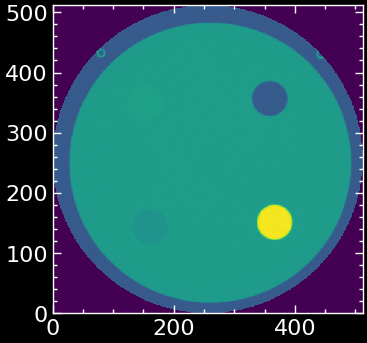

In [63]:
plt.figure(figsize=(4,4))
plt.pcolormesh(im)
plt.show()

The axis are in pixel counts, not in spacial dimensions. Easy fix with meshgrids:

In [69]:
dx = dy = 0.429 #mm
x, y = dx*np.arange(im.shape[1]), dy*np.arange(im.shape[0])
xv, yv = np.meshgrid(x, y)

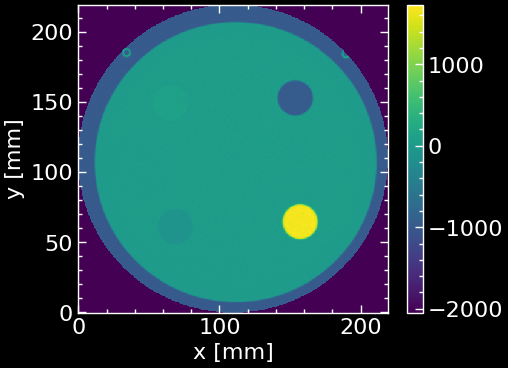

In [71]:
plt.figure(figsize=(5,4))
plt.pcolormesh(xv, yv, im)
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.colorbar()
plt.show()